Keepa data has been fetched


/Users/zhanglinshu/Documents/market_trend_analysis/amz-market-trend-analysis- Boxing Gloves-20180621/kpdata.py:90: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_market_trends.nan = nan_count
		Review_count: 12.305555555555555
		Price: 30.31111111111111
		Bsr: 19.06111111111111



去重后商品数为：100
预测月销售量为28238


main.ipynb:17: RuntimeWarning: Mean of empty slice
  "metadata": {


有双轴需要设置副轴grid
有双轴需要设置副轴grid
有双轴需要设置副轴grid
有双轴需要设置副轴grid
有双轴需要设置副轴grid
Index: 42				Variation: -24851.231184509816
Index: 58				Variation: -20052.920678988812
有双轴需要设置副轴grid
拳击手套( Boxing Gloves )
品类市场商品平均上架天数为635天，产品更新迭代很慢。
总体销售水平很低，销量分布较为集中，
销售量排名前10%的商品占据总销售量的50.69%。
榜单中有47个品牌，品牌较少，其中Everlast表现最好，有18款商品进入榜单，销量占总销量的21.95%，对其他品牌有很大优势，Sanabul同样表现较好，有3款商品进入榜单，销量占总销量的21.54%，对其他品牌有很大优势，品类市场品牌竞争压力很大。
商品价格跨度很大，
价格分布较为分散，
在$16-$24的商品最多，有25款商品，且有着最高的预测平均销量，适合作为定价区间。

 市场价格波动下降，可能存在低价竞争
。
总体评论数很少，没有评论量在2500以上的商品，商品竞争压力很小。
总评论数期末比期初增长8.20%，增长很慢。
产品平均评论星级较低，产品改进空间较大，波动较小，消费者的市场偏好较为稳定。商品有77%来自于AMZ，22%来自于FBA，AMZ卖家过半。
根据根据Google趋势，关键词Boxing Gloves的热度变化季节性很弱，全年都处于波动状态，没有明显的季节性。
        
预计在短期内，相对高涨的市场采购热情可能引致较强的货源竞争压力，出口产品的成本压价空间较小，具备自主生产能力与固定货源资源的出口卖家或将拥有较大的市场优势。




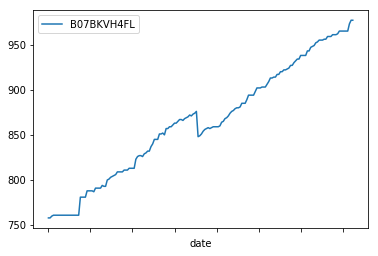

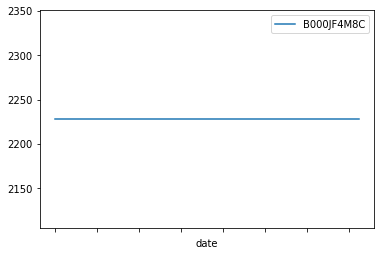

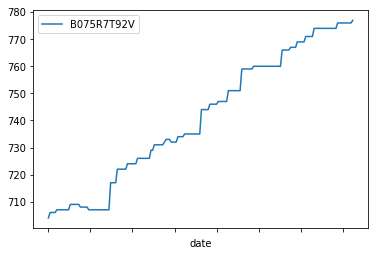

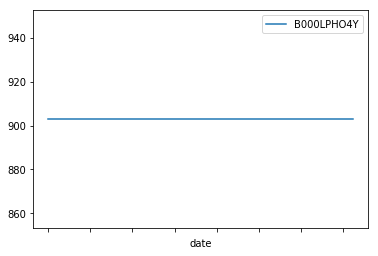

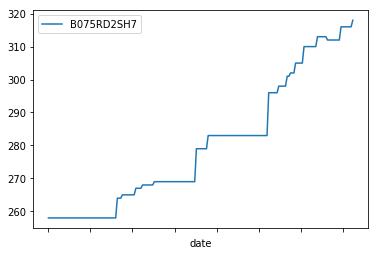

In [13]:
# %run main.ipynb

In [14]:
# coding=utf-8
import os
import fnmatch
from textwrap import wrap

from tools import read_data
# from configs import category_name, folder_path
from datas import jungle_scout_data

In [15]:
subcategory_names = [f.replace('.csv','') for f in os.listdir('{}/sub_category/'.format(folder_path)) if fnmatch.fnmatch(f, '*.csv')]

In [16]:
df_subcategory = read_data('{}/sub_category/{}.csv'.format(folder_path,subcategory_names[0]), header=7)

In [17]:
def get_info_of_subcategory_in_category(df_subcategory):
    subcategory_asin_in_category = []
    subcategory_Est_sale_in_category = []
    subcategory_reviews_in_category = []
    for i in range(len(df_subcategory)):
        if df_subcategory.ASIN[i] in jungle_scout_data.ASIN.values:
            subcategory_asin_in_category.append(df_subcategory.ASIN[i])
            subcategory_Est_sale_in_category.append(df_subcategory['Sales'][i])
            subcategory_reviews_in_category.append(df_subcategory['Reviews'][i])
    df_subcategory_in_category = pd.DataFrame({'ASIN':subcategory_asin_in_category,'Sales':subcategory_Est_sale_in_category,'Reviews':subcategory_reviews_in_category})
    return df_subcategory_in_category

def get_distribution_info_of_subcategory_in_category(df_subcategory_in_category):
    subcategory_in_category_asin_sum = df_subcategory_in_category['ASIN'].count()
    subcategory_in_category_sale_sum = np.nanmean(df_subcategory_in_category['Sales'])*100
    subcategory_in_category_review_sum = np.nanmean(df_subcategory_in_category['Reviews'])*100
    return {'asin_sum':subcategory_in_category_asin_sum,'sale_sum':subcategory_in_category_sale_sum,'review_sum':subcategory_in_category_review_sum}

In [18]:
def get_statistics_info_of_subcategory(df_subcategory):
    subcategory_sale_sum = (np.nanmean(df_subcategory['Sales'])*len(df_subcategory['Sales'])).round()
    subcategory_sale_top10 = np.nanmean(df_subcategory['Sales'][0:10])*10
    subcategory_sale_top10_percentage = subcategory_sale_top10/subcategory_sale_sum
    subcategory_price_mean = (np.nanmean(df_subcategory['Price'])).round(2)
    subcategory_bsr_mean = np.nanmean(df_subcategory['Rank'])
    subcategory_review_mean = np.nanmean(df_subcategory['Reviews'])
    subcategory_rate_mean = (np.nanmean(df_subcategory['Rating'])).round(2)
    return {'总销售量':subcategory_sale_sum,'top10总销售量':subcategory_sale_top10,
            'top10销量占比':subcategory_sale_top10_percentage,
            '子品类平均价格':subcategory_price_mean,
            '平均BSR':subcategory_bsr_mean,'平均评论数':subcategory_review_mean,
            '平均星级':subcategory_rate_mean}

In [19]:
distribution_info_sum = pd.DataFrame({'asin_sum':[],'sale_sum':[],'review_sum':[]})
get_statistics_info = pd.DataFrame({'总销售量':[],'top10总销售量':[],'top10销量占比':[],'子品类平均价格':[],'平均BSR':[],'平均评论数':[],'平均星级':[]})
brand_count = {}
for subcategory_name in subcategory_names:
    df_subcategory = read_data('{}/sub_category/{}.csv'.format(folder_path,subcategory_name), header=7)
    df_subcategory_in_category = get_info_of_subcategory_in_category(df_subcategory)
    distribution_info_of_subcategory_in_category = get_distribution_info_of_subcategory_in_category(df_subcategory_in_category)
    distribution_info_sum = distribution_info_sum.append(pd.DataFrame(distribution_info_of_subcategory_in_category,index=[subcategory_name]))
    get_statistics_info = get_statistics_info.append(pd.DataFrame(get_statistics_info_of_subcategory(df_subcategory),index=[subcategory_name]))
    brand_count[subcategory_name] = set(df_subcategory.Brand.values).__len__()

In [20]:
get_statistics_info[['总销售量','top10总销售量','top10销量占比','子品类平均价格','平均BSR','平均评论数','平均星级']]

总销售量  top10总销售量  top10销量占比  子品类平均价格          平均BSR  \
Boxing Bag Gloves        4354.0     3114.0   0.715204    48.13  252897.262626   
Boxing Fight Gloves      6546.0     4348.0   0.664222    40.24  182614.858586   
Boxing Training Gloves  24762.0    15382.0   0.621194    49.19   55428.979798   

                             平均评论数  平均星级  
Boxing Bag Gloves        31.850000  4.14  
Boxing Fight Gloves      66.860000  3.99  
Boxing Training Gloves  124.141414  4.19

In [21]:
class ImageDoubleBar(ImageBar):
    def plot(self):
        rects = self.ax.bar(self.x-0.15, self.y, 0.3, zorder=3, label=self.legend_name[0], color=self.default_colors['blue'])
        for rect in rects:
            height = rect.get_height()
            self.ax.text(rect.get_x() + rect.get_width()/2., 1.02*height, 
                        '%d' % int(height), 
                        ha='center', va='bottom')
        rects = self.ax.bar(self.x+0.15, self.y2, 0.3, zorder=3, label=self.legend_name[1], color=self.default_colors['red'])
        for rect in rects:
            height = rect.get_height()
            self.ax.text(rect.get_x() + rect.get_width()/2., 1.02*height, 
                        '%d' % int(height), 
                        ha='center', va='bottom')
    def add_legend(self):
        if self.legend_name:
            lines1, labels1 = self.ax.get_legend_handles_labels()
            self.ax.legend(lines1, labels1, loc='upper center', ncol=2, bbox_to_anchor=(0.5, 1.4), prop=self.legend_font, frameon=False)

class ImagePie(Image):
    colors = ['#F3903F','#B4B4B4','#FCC900','#6CADDD',
    '#D9D4CF', '#7C7877', '#ABD0CE', '#F0E5DE', '#6AAFE6', 
    '#D09E88', '#D4DFE6']
    def init(self):
        self.fig = plt.figure(figsize=(self.IMAGE_WIDTH, self.IMAGE_HIGH))
        self.gs = gridspec.GridSpec(1, 1)
        self.ax = self.fig.add_subplot(self.gs[0])
        self.init_plus()
        self.set_xticks()
        self.add_ax()
        self.plot()
        self.add_title()
        self.set_grid()
        self.set_margins()
        self.set_spines()
        self.set_tick_marks()
        self.add_legend()
        self.tight_layout()
        self.config_add()
        plt.close()
        
    def plot(self):
        self.explode = np.ones(self.length)*0.03
        self.patches = self.ax.pie(self.y, 
            explode=self.explode, 
            labels=None, 
            colors=self.colors, 
            autopct='%d%%')

    def add_title(self):
        if self.title:
            plt.title(self.title, fontproperties=self.title_font,
                      x=0.8,
                      y=self.title_y)
            
    def set_grid(self):
        pass
        
    def add_legend(self):
        handles = []
        for i, l in enumerate(self.labels):
            handles.append(mpl.patches.Patch(color=self.colors[i], label=l))

        self.ax.legend(handles, self.labels,
                       bbox_to_anchor=(1, 0.54),  
                       loc='center',
                       frameon=False
                      )

In [22]:
# from models import Document, Chapter
# document = Document()

In [23]:
# 在模型中添加子品类Chapter
document.chapters[0].add_chapter(subchapter_number=4)

In [24]:
subchapter = document.chapters[0].subchapters[5]
subchapter.title = '6.{}品类下各子品类概况'.format(category_name)
subchapter.subchapters[0].title = '（1）{}品类销售量分布'.format(category_name)
subchapter.subchapters[0].foreword = '根据对 {} 品类Top100榜单的数据及其各子品类Top100榜单的数据，统计后得到下列图表：'.format(category_name)
subchapter.subchapters[1].title = '（2）{}子品类竞争环境'.format(category_name)

subchapter.subchapters[2].title = '（3）{}子品类口碑情况'.format(category_name)

subchapter.subchapters[3].title = '（4）{}子品类价格分布'.format(category_name)


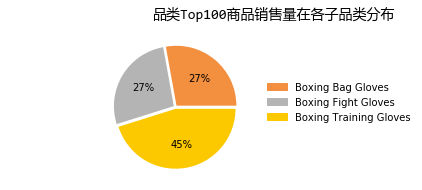

In [25]:
labels = [ '\n'.join(wrap(l, 30)) for l in distribution_info_sum.index]
image = ImagePie(data=distribution_info_sum.sale_sum,
                labels=labels,
                title='品类Top100商品销售量在各子品类分布',
                title_y=1.08)
image.init()
image.ax.axis('equal')
document.chapters[0].subchapters[5].subchapters[0].set_image(image.fig)
image.fig

In [26]:
document.chapters[0].subchapters[5].subchapters[0].foreword = """
根据对{}品类Top100榜单的数据及其各子品类Top100榜单的数据，统计后得到下列图表：
""".format(category_name)
document.chapters[0].subchapters[5].subchapters[0].content = """
从上表可以看出，在{}品类Top100商品中，市场销售非常集中，
主要集中在Boxing Training Gloves（拳击训练手套）子品类，
占据父品类榜单的45%。
""".format(category_name)

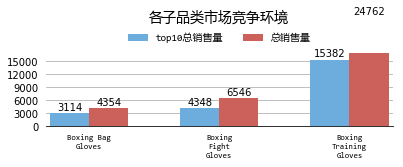

In [29]:
labels = [ '\n'.join(wrap(l, 10)) for l in get_statistics_info.index]

image = ImageDoubleBar(data=get_statistics_info['top10总销售量'],
                   title='各子品类市场竞争环境',
                   labels=labels,
                   legend_name=['top10总销售量', '总销售量'],
                   y2=get_statistics_info['总销售量'],
                   xticks_rotation='horizontal',
                   title_y = 1.35
                  )
image.xticks_font.set_size(8)
image.init()
document.chapters[0].subchapters[5].subchapters[1].set_image(image.fig)
image.fig

In [30]:
get_statistics_info[['总销售量','top10总销售量','top10销量占比']]

总销售量  top10总销售量  top10销量占比
Boxing Bag Gloves        4354.0     3114.0   0.715204
Boxing Fight Gloves      6546.0     4348.0   0.664222
Boxing Training Gloves  24762.0    15382.0   0.621194

In [20]:
document.chapters[0].subchapters[5].subchapters[1].content = """
从上表可以看出，{}的各子品类中，
Boxing Training Gloves（拳击训练手套）子品类不仅有着最大的总销量，竞争压力也相对较小，
排名前十的商品销量占总销量的62.12%。
""".format(category_name)

有双轴需要设置副轴grid


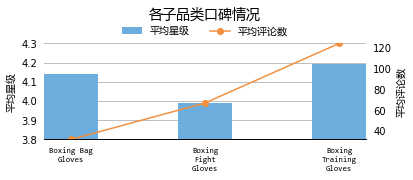

In [31]:
labels = [ '\n'.join(wrap(l, 10)) for l in get_statistics_info.index]

image = ImageTwinx(data=get_statistics_info['平均星级'],
                   title='各子品类口碑情况',
                   labels=labels,
                   legend_name=['平均星级', '平均评论数'],
                   y2=get_statistics_info['平均评论数'],
                   xticks_rotation='horizontal',
                   title_y = 1.2
                  )
image.intervals = 0.1
image.init()
image.ax.set_ylim(top=int((np.nanmean(image.y)+0.25)*10)/10, 
                  bottom=int((np.nanmean(image.y)-0.25)*10)/10)
document.chapters[0].subchapters[5].subchapters[2].set_image(image.fig)
image.fig

In [22]:
document.chapters[0].subchapters[5].subchapters[2].content = """
从上表可以看出，Boxing Bag Gloves（拳击沙袋手套）评论星级很低，商品口碑积累较少，
还有很大产品改进空间，Boxing Training Gloves（拳击训练手套）子品类子品类评价最好，市场发展最为成熟。
"""

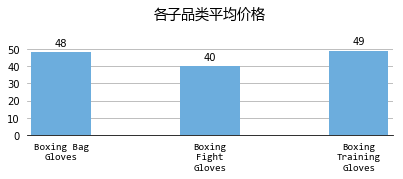

In [32]:
labels = [ '\n'.join(wrap(l, 10)) for l in get_statistics_info.index]
image = ImageBar(labels=labels,
                 data=get_statistics_info['子品类平均价格'],
                 title=u'各子品类平均价格',
                 xticks_rotation='horizontal'
                )
image.xticks_font.set_size(10)
image.init()
document.chapters[0].subchapters[5].subchapters[3].set_image(image.fig)
image.fig

In [24]:
document.chapters[0].subchapters[5].subchapters[3].content = """
{}各子品类均价差异很小，Boxing Bag Gloves（拳击沙袋手套）均价$49，售价最高；
Boxing Fight Gloves(拳击搏斗手套)均价$40，售价最低。
""".format(category_name)